# JCT 可変複数裏付け（取引ごとに独立）

## 設定

In [1]:
import sys
sys.path.append('../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.variableLocal import AutoAdjustmentTransaction, JCTVariableTransaction
from scripts.price_data.get_price import GetPriceData

price_getter = GetPriceData()

from pprint import pprint

## JCT ポートフォリオ

In [2]:
# a. 国内出来高
jct_portfolio_a = {
    'JPY': {
        'num': 100000000,
        'is_usd': False,
        'priority': 10,
    },
    '8306.T': {
        'num': 2000000,
        'is_usd': False,
        'priority': 1,
    },
    '8604.T': {
        'num': 100000,
        'is_usd': False,
        'priority': 0,
    }
}

# b. 円安（GAFAM）
jct_portfolio_b = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# c. グロース（マザーズ）
jct_portfolio_c = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# d. 時価総額上位
jct_portfolio_d = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '9984.T': {
        'num': 10000,
        'is_usd': False
    },
    '6098.T': {
        'num': 10000,
        'is_usd': False
    },
    '6758.T': {
        'num': 5000,
        'is_usd': False
    }
}

# e. ボラティリティ
jct_portfolio_e = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 50000,
        'is_usd': False
    },
    'IVV': {
        'num': 300,
        'is_usd': True
    }
}

### ST ポートフォリオ

In [3]:
# a. 国内出来高
st_portfolio_a = {
    '7203.T': {
        'num': 70000,
        'is_usd': False
    },
    '9501.T': {
        'num': 200000,
        'is_usd': False
    },
    '4689.T': {
        'num': 120000,
        'is_usd': False
    }
}

# b. 円安（GAFAM）
st_portfolio_b = {
    'GOOGL': {
        'num': 150,
        'is_usd': True
    },
    'AMZN': {
        'num': 150,
        'is_usd': True
    },
    'FB': {
        'num': 1500,
        'is_usd': True
    },
    'AAPL': {
        'num': 4000,
        'is_usd': True
    },
    'MSFT': {
        'num': 2000,
        'is_usd': True
    },
}

# c. グロース（マザーズ）
st_portfolio_c = {
    '4385.T': {
        'num': 10000,
        'is_usd': False
    },
    '4477.T': {
        'num': 100000,
        'is_usd': False
    },
    '2158.T': {
        'num': 15000,
        'is_usd': False
    },
    '3994.T': {
        'num': 10000,
        'is_usd': False
    }
}

# d. 時価総額上位
st_portfolio_d = {
    '7203.T': {
        'num': 65000,
        'is_usd': False
    },
    '9983.T': {
        'num': 1000,
        'is_usd': False
    },
    '6861.T': {
        'num': 1000,
        'is_usd': False
    }
}

# e. ボラティリティ
st_portfolio_e = {
    'TSLA': {
        'num': 750,
        'is_usd': True
    },
    'NVDA': {
        'num': 2000,
        'is_usd': True
    },
    '6195.T': {
        'num': 100000,
        'is_usd': False
    },
    '6920.T': {
        'num': 2500,
        'is_usd': False
    }
}

# NVIDIA
st_portfolio_f = {
    'NVDA': {
        'num': 5000,
        'is_usd': True
    },
    'AAPL': {
        'num': 4000,
        'is_usd': True
    },
}

## シミュレーション（不足時取引中止）

In [4]:
def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

transaction = VariableLocalTransaction(jct_portfolio_a, st_portfolio_a, date(2021, 10, 1), lender_loan_ratio=1.05, print_log=True, auto_deposit=False)


print('Start simulation...')
print('='*50)
for date in date_range(date(2021, 10, 2), date(2021, 10, 31)):
    print('='*50)
    print(date)
    transaction.check_diff_and_margin_call(date)
    print('='*50)
print('='*50)
print('Finished.')

JCT portfolio: {'JPY': {'num': 100000000, 'is_usd': False, 'priority': 10}, '8306.T': {'num': 2000000, 'is_usd': False, 'priority': 1}, '8604.T': {'num': 100000, 'is_usd': False, 'priority': 0}}
ST portfolio: {'7203.T': {'num': 70000, 'is_usd': False}, '9501.T': {'num': 200000, 'is_usd': False}, '4689.T': {'num': 120000, 'is_usd': False}}
2021-10-01: Price updating...
7203.T: 1967.0
9501.T: 321.0
4689.T: 717.0
2021-10-01: Price updating...
JPY: 1.0
8306.T: 640.0
8604.T: 543.7
Transaction is created.
{'auto_deposit': False,
 'borrower_jct_num': 1132043500,
 'date': datetime.date(2021, 10, 1),
 'jct_difference': 0,
 'jct_price': 1.0,
 'jct_total_value': 1434370000,
 'lender_jct_num': 302326500,
 'st_total_value': 287930000.0}
Start simulation...
2021-10-02
2021-10-02: Price updating...
7203.T: 1932.0
9501.T: 338.0
4689.T: 712.9
2021-10-02: Price updating...
JPY: 1.0
8306.T: 632.2
8604.T: 542.0
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1128196219,
 'date': datetime.da

7203.T: 2040.0
9501.T: 354.0
4689.T: 692.0
2021-10-17: Price updating...
JPY: 1.0
8306.T: 660.4
8604.T: 560.2
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1131850754,
 'date': datetime.date(2021, 10, 17),
 'jct_difference': 0,
 'jct_price': 1.029594,
 'jct_total_value': 1476820000.0,
 'lender_jct_num': 302519246,
 'st_total_value': 296640000.0}
2021-10-18
2021-10-18: Price updating...
7203.T: 2040.0
9501.T: 354.0
4689.T: 692.0
2021-10-18: Price updating...
JPY: 1.0
8306.T: 660.4
8604.T: 560.2
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1131850754,
 'date': datetime.date(2021, 10, 18),
 'jct_difference': 0,
 'jct_price': 1.029594,
 'jct_total_value': 1476820000.0,
 'lender_jct_num': 302519246,
 'st_total_value': 296640000.0}
2021-10-19
2021-10-19: Price updating...
7203.T: 2030.0
9501.T: 342.0
4689.T: 701.5
2021-10-19: Price updating...
JPY: 1.0
8306.T: 655.2
8604.T: 556.7
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1131646196,
 'd

### ログの可視化

In [5]:
logs = transaction.logs
date_list = [log['date'] for log in logs]
jct_price_list = [log['jct_price'] for log in logs]
st_total_value_list = [log['st_total_value'] for log in logs]
borrower_jct_num_list = [log['borrower_jct_num'] for log in logs]
lender_jct_num_list = [log['lender_jct_num'] for log in logs]
jct_diff_num_list = [log['jct_difference'] for log in logs]
deposit_bool_list = [log['auto_deposit'] for log in logs]

date_auto_deposit = []
for i, x in enumerate(deposit_bool_list):
    if x:
        date_auto_deposit.append(date_list[i])

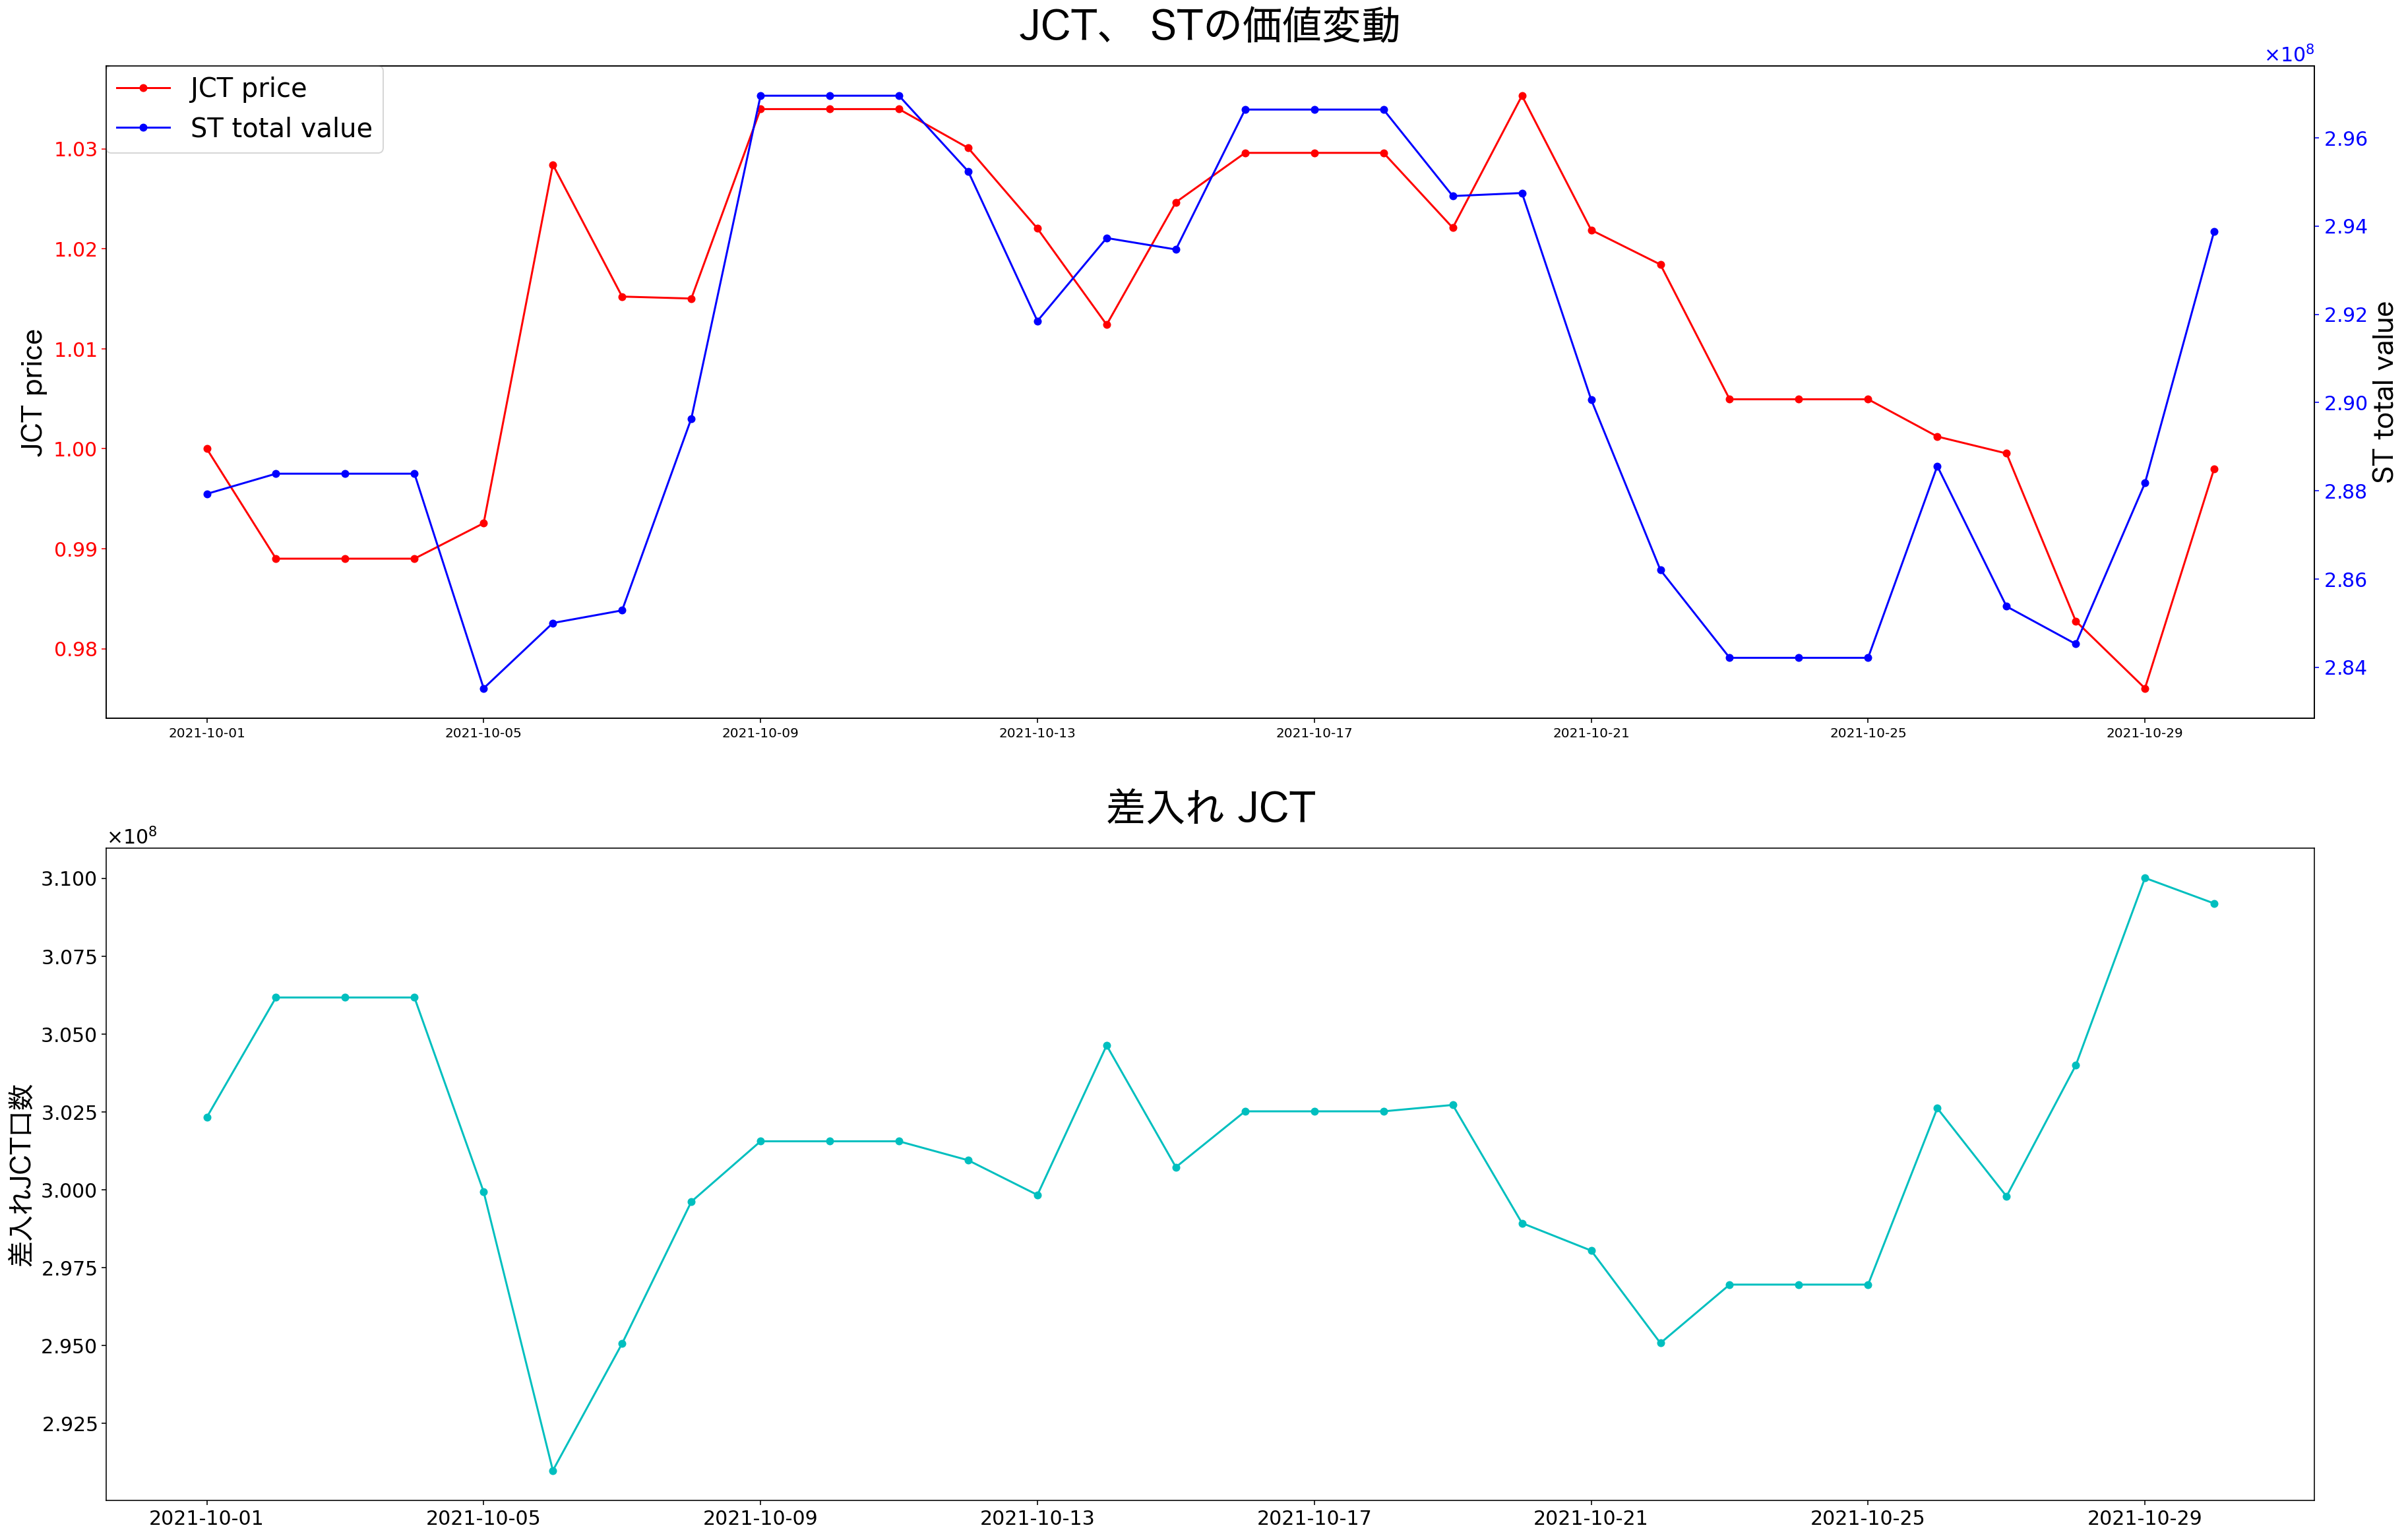

In [6]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_price_list, marker='o', markersize=5, color='red', label='JCT price')
ax1.set_ylabel('JCT price', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_list, marker='o', markersize=5, color='blue', label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red', labelsize=15)
ax1.yaxis.offsetText.set_fontsize(15)
ax1.xaxis.offsetText.set_fontsize(15)
ax1_2.xaxis.offsetText.set_fontsize(15)
ax1_2.tick_params(axis='y', colors='blue', labelsize=15)
ax1_2.yaxis.offsetText.set_fontsize(15)
ax1.vlines(date_auto_deposit, min(jct_price_list), max(jct_price_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='c')
ax2.set_ylabel('差入れJCT口数', fontsize=20, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=15)
ax2.yaxis.offsetText.set_fontsize(15)
ax2.set_title('差入れ JCT', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

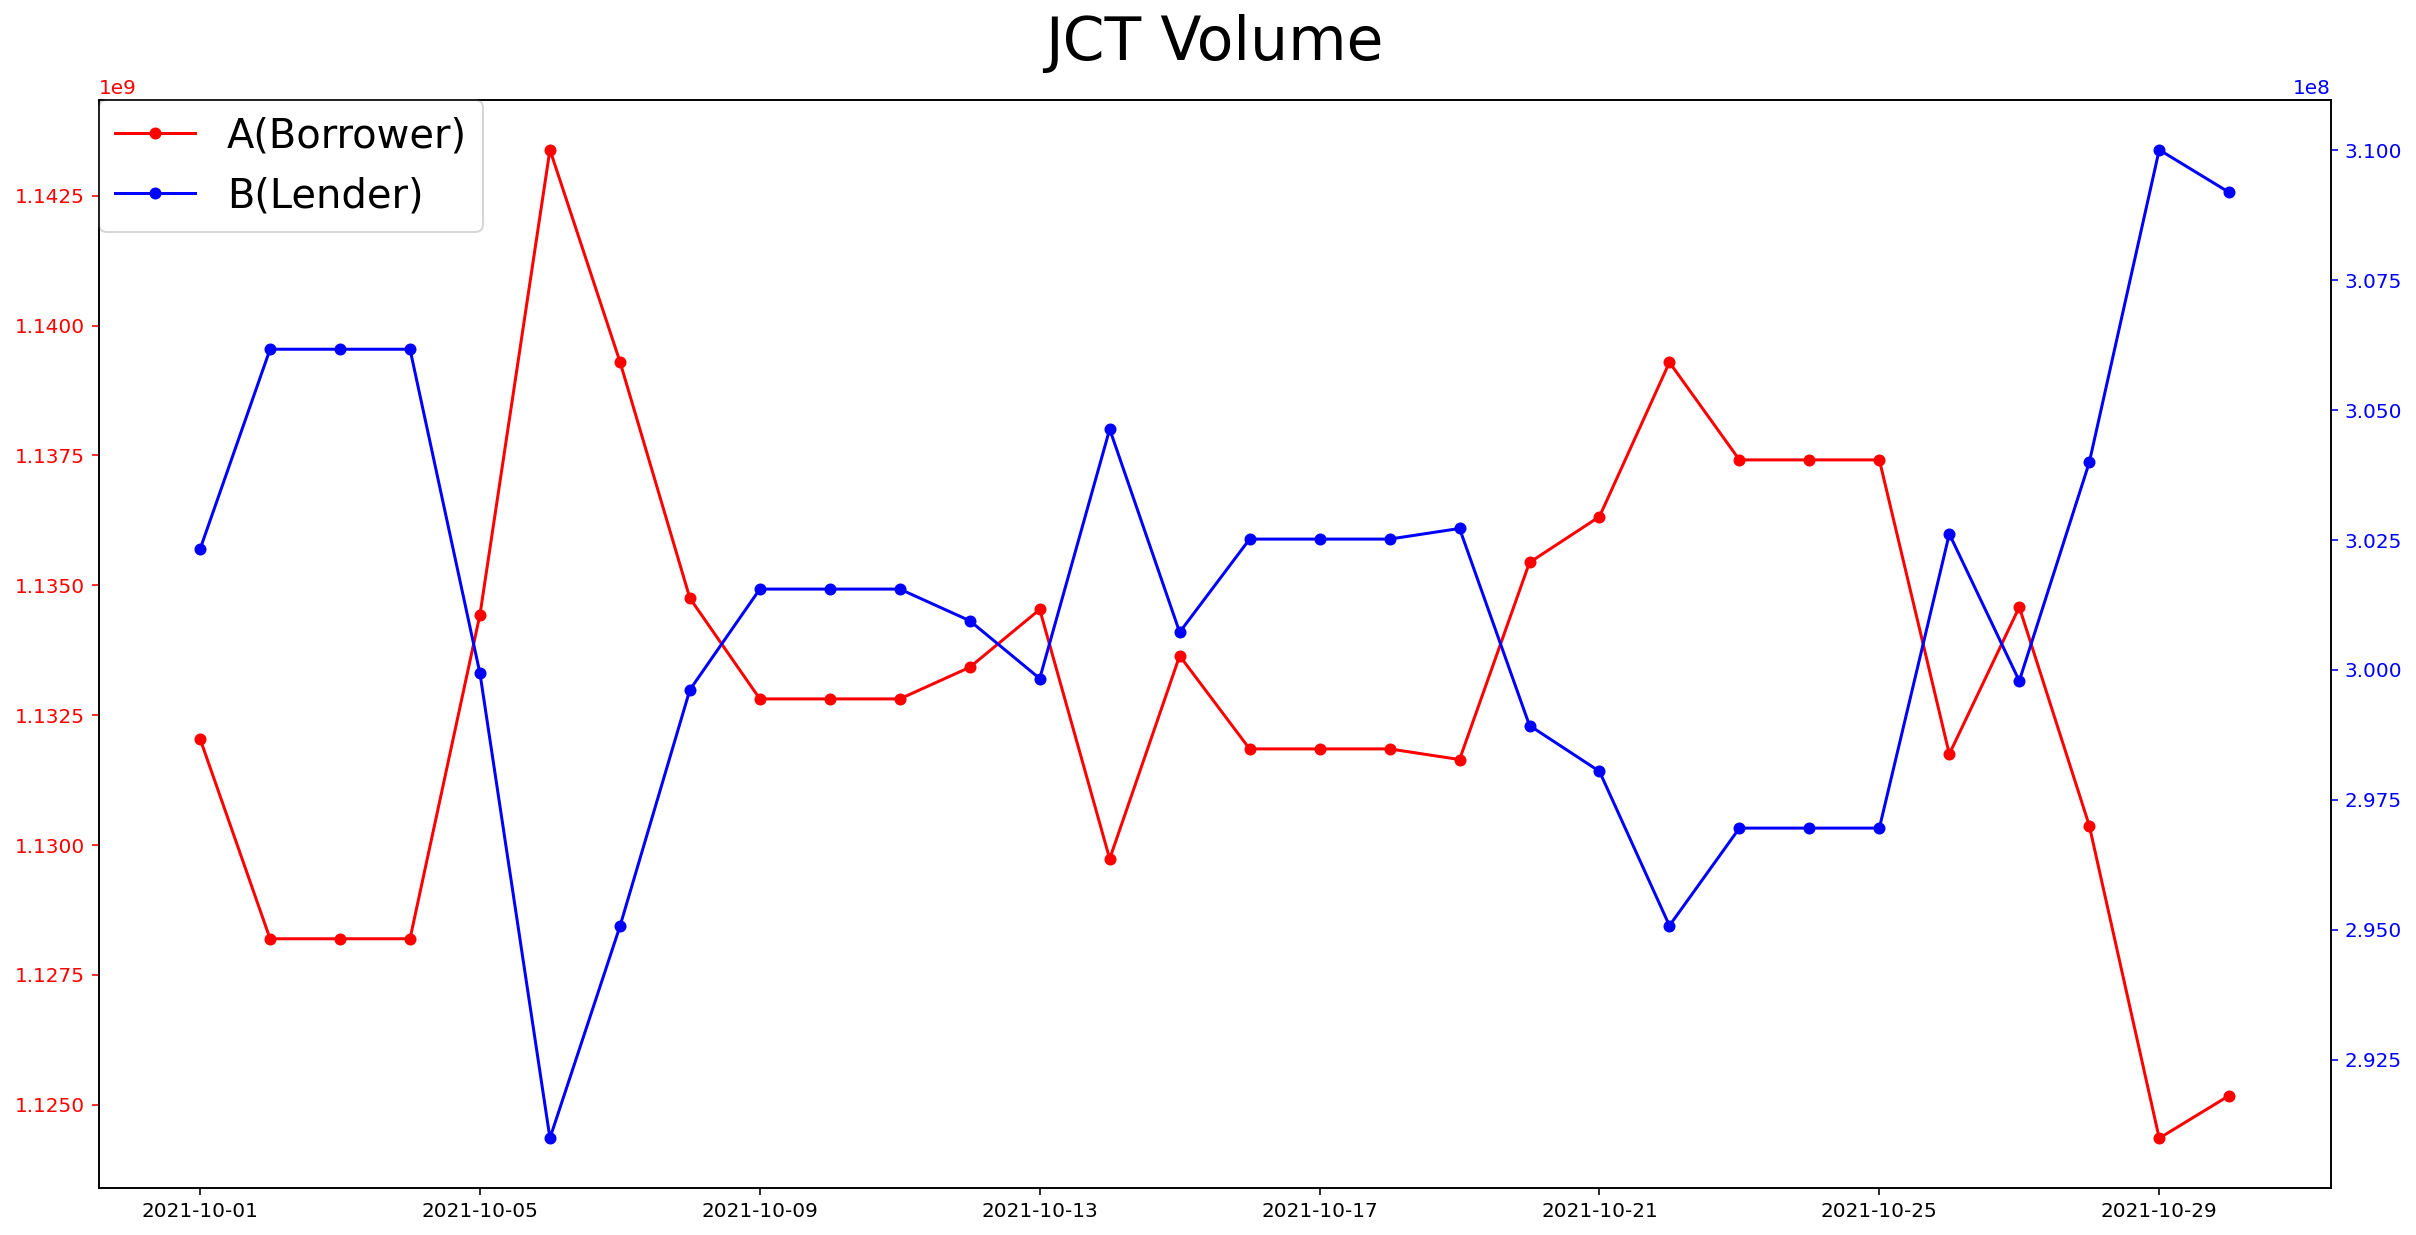

In [7]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

plt.title('JCT Volume', fontsize=30, pad=20)
ax1.plot(date_list, borrower_jct_num_list, marker='o', markersize=5, color='red', label='A(Borrower)')
# ax1.set_ylabel()
ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='blue', label='B(Lender)')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

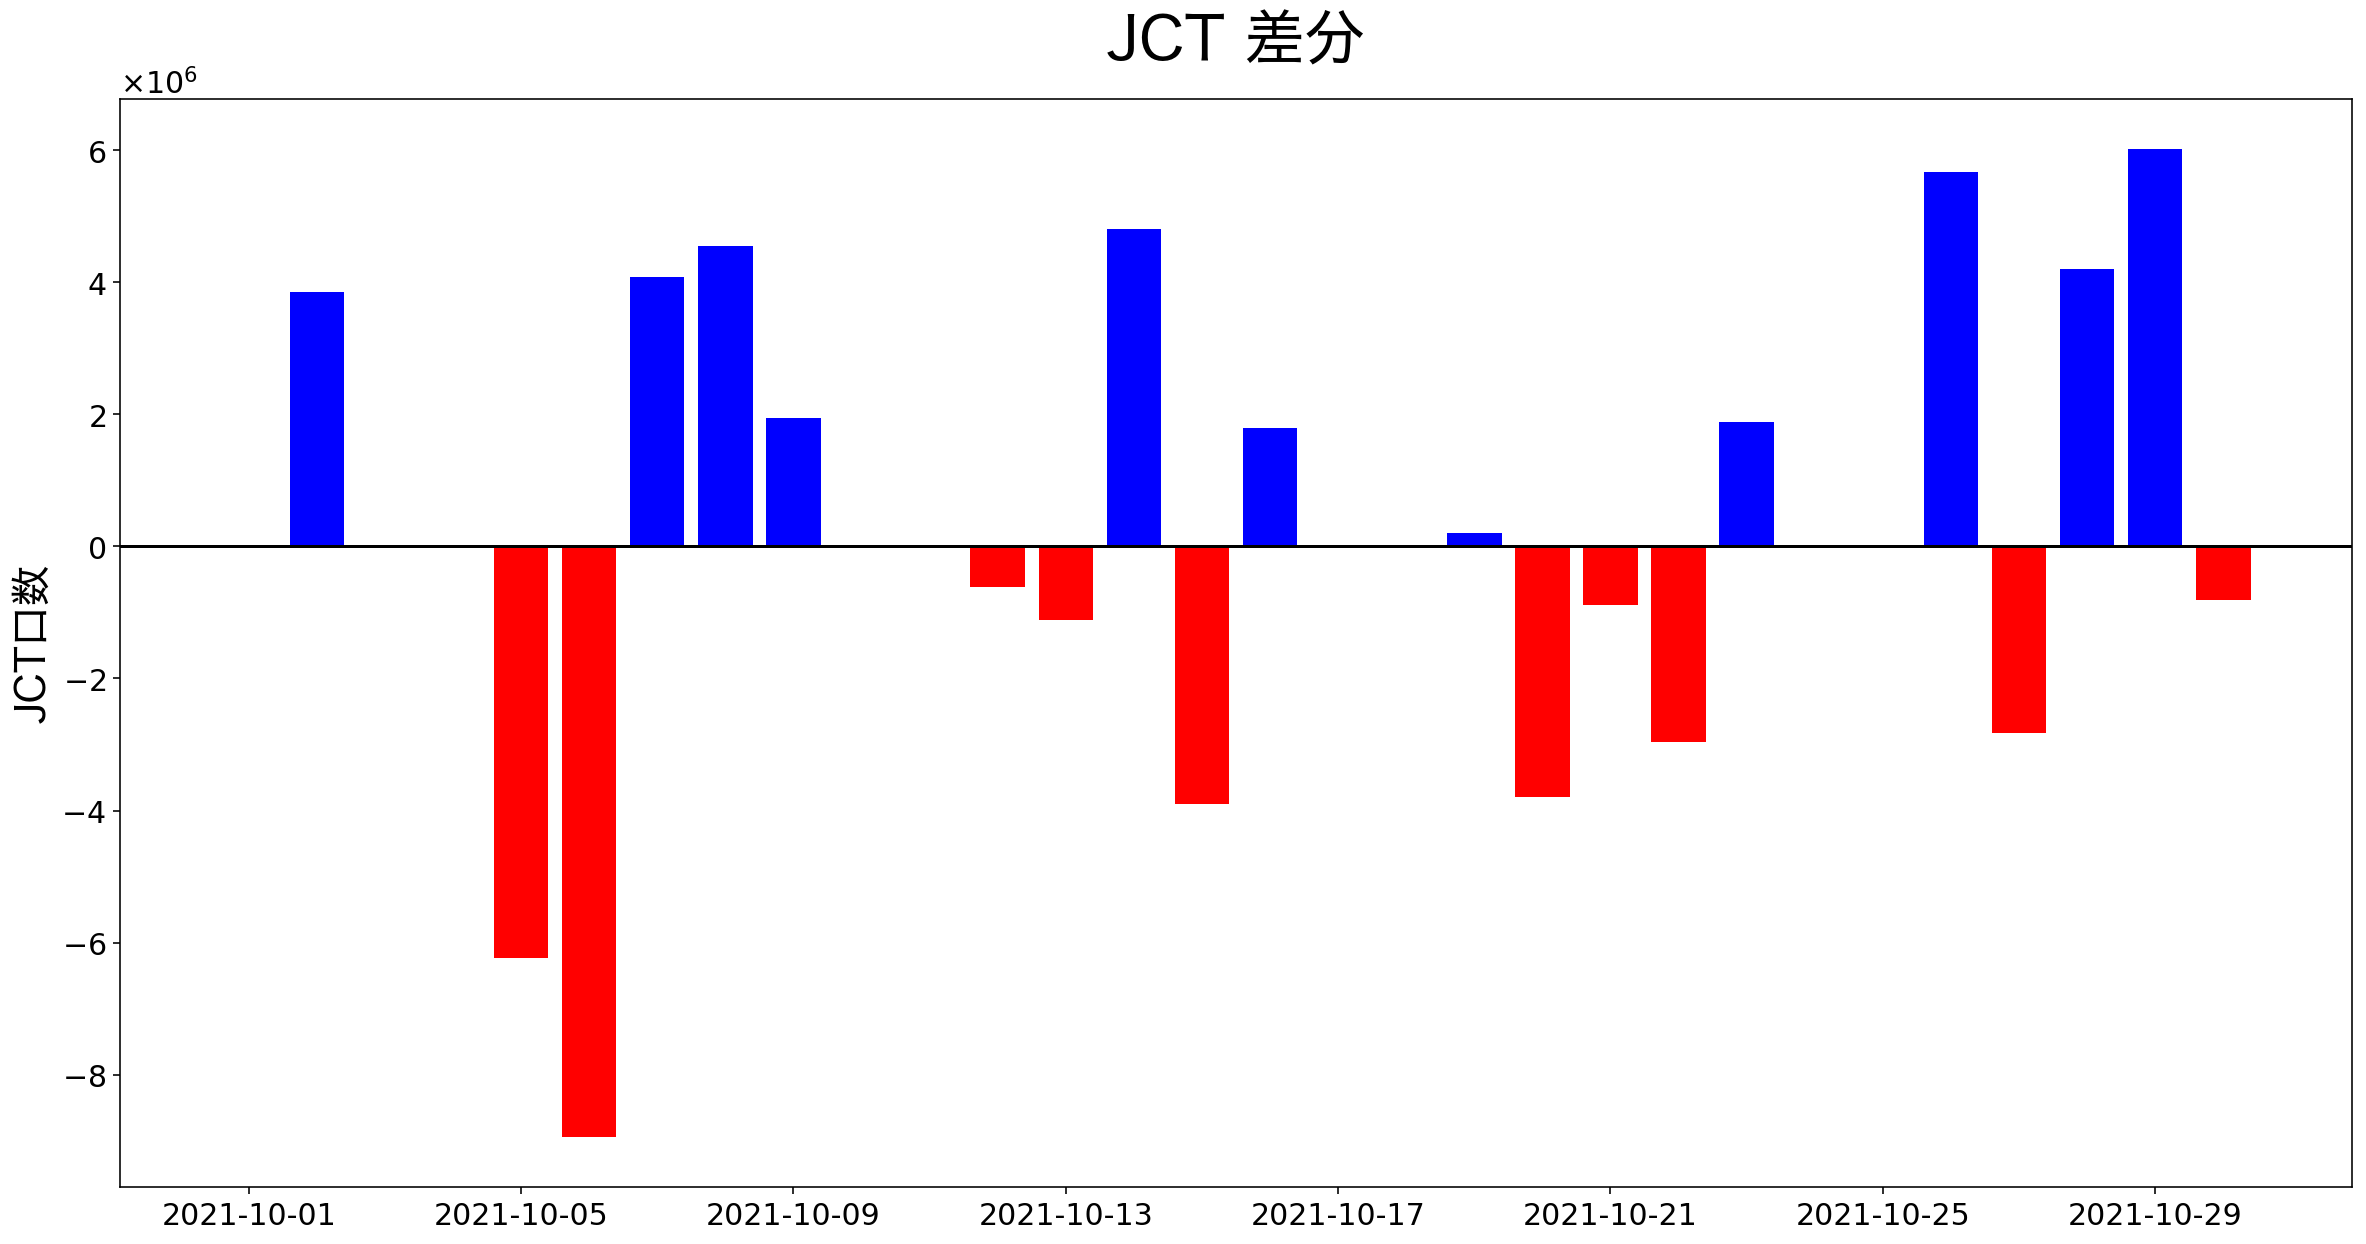

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
jct_diff_num_color = ['blue' if diff > 0 else 'red' for diff in jct_diff_num_list]

ax.bar(date_list, jct_diff_num_list, color=jct_diff_num_color)
ax.set_title('JCT 差分', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT口数', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')
ax.vlines(date_auto_deposit, min(jct_diff_num_list), max(jct_diff_num_list), color='orange', linestyle='dashed', linewidth=3)

## シミュレーション（不足分自動現金補填）

In [ ]:
from datetime import date, timedelta
def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

transaction = JCTVariableTransaction(jct_portfolio_a, st_portfolio_f, date(2022, 6, 1), options={
    'lender_loan_ratio': 1.05,
    'print_log': True, 
    'auto_deposit': True,
})


print('Start simulation...')
print('='*50)
for date in date_range(date(2022, 6, 2), date(2022, 10, 1)):
    print('='*50)
    print(date)
    transaction.check_diff_and_margin_call(date)
    print('='*50)
print('='*50)
print('Finished.')

JCT portfolio: {'JPY': {'num': 100000000, 'is_usd': False, 'priority': 10}, '8306.T': {'num': 2000000, 'is_usd': False, 'priority': 1}, '8604.T': {'num': 100000, 'is_usd': False, 'priority': 0}}
ST portfolio: {'NVDA': {'num': 5000, 'is_usd': True}, 'AAPL': {'num': 4000, 'is_usd': True}}
2022-06-01: Price updating...
NVDA: 23859.8
AAPL: 19019.3
2022-06-01: Price updating...
JPY: 1.0
8306.T: 745.5
8604.T: 513.5
Transaction is created.
{'auto_deposit': False,
 'borrower_jct_num': 1437204990,
 'date': datetime.date(2022, 6, 1),
 'jct_difference': 0,
 'jct_price': 1.0,
 'jct_total_value': 1642350000,
 'lender_jct_num': 205145010,
 'st_total_value': 195376200.0}
Start simulation...
2022-06-02
2022-06-02: Price updating...
NVDA: 23584.4
AAPL: 19144.3
2022-06-02: Price updating...
JPY: 1.0
8306.T: 740.9
8604.T: 514.4
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1436986689,
 'date': datetime.date(2022, 6, 2),
 'jct_difference': 218301,
 'jct_price': 0.994453,
 'jct_total_value

NVDA: 20923.2
AAPL: 17442.9
2022-06-17: Price updating...
JPY: 1.0
8306.T: 731.0
8604.T: 489.8
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1455677386,
 'date': datetime.date(2022, 6, 17),
 'jct_difference': -7494707,
 'jct_price': 0.980899,
 'jct_total_value': 1610980000.0,
 'lender_jct_num': 186672614,
 'st_total_value': 174387600.0}
2022-06-18
2022-06-18: Price updating...
NVDA: 21028.4
AAPL: 17421.3
2022-06-18: Price updating...
JPY: 1.0
8306.T: 730.7
8604.T: 484.8
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1455078903,
 'date': datetime.date(2022, 6, 18),
 'jct_difference': 598483,
 'jct_price': 0.980229,
 'jct_total_value': 1609880000.0,
 'lender_jct_num': 187271097,
 'st_total_value': 174827200.0}
2022-06-19
2022-06-19: Price updating...
NVDA: 22409.8
AAPL: 18379.9
2022-06-19: Price updating...
JPY: 1.0
8306.T: 730.7
8604.T: 484.8
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1443572948,
 'date': datetime.date(2022, 6, 19),
 

NVDA: 20207.8
AAPL: 19116.6
2022-07-04: Price updating...
JPY: 1.0
8306.T: 734.7
8604.T: 503.2
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1453365118,
 'date': datetime.date(2022, 7, 4),
 'jct_difference': 0,
 'jct_price': 0.98622,
 'jct_total_value': 1619720000.0,
 'lender_jct_num': 188984882,
 'st_total_value': 177505400.0}
2022-07-05
2022-07-05: Price updating...
NVDA: 20207.8
AAPL: 19116.6
2022-07-05: Price updating...
JPY: 1.0
8306.T: 743.0
8604.T: 503.0
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1455280164,
 'date': datetime.date(2022, 7, 5),
 'jct_difference': -1915046,
 'jct_price': 0.996316,
 'jct_total_value': 1636300000.0,
 'lender_jct_num': 187069836,
 'st_total_value': 177505400.0}
2022-07-06
2022-07-06: Price updating...
NVDA: 20327.0
AAPL: 19229.5
2022-07-06: Price updating...
JPY: 1.0
8306.T: 710.0
8604.T: 496.7
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1446188415,
 'date': datetime.date(2022, 7, 6),
 'jct_diff

2022-07-21: Price updating...
NVDA: 24607.6
AAPL: 21148.7
2022-07-21: Price updating...
JPY: 1.0
8306.T: 726.5
8604.T: 510.7
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1419132585,
 'date': datetime.date(2022, 7, 21),
 'jct_difference': 7533807,
 'jct_price': 0.976691,
 'jct_total_value': 1604070000.0,
 'lender_jct_num': 223217415,
 'st_total_value': 207632800.0}
2022-07-22
2022-07-22: Price updating...
NVDA: 24980.2
AAPL: 21499.6
2022-07-22: Price updating...
JPY: 1.0
8306.T: 731.5
8604.T: 511.0
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1417029898,
 'date': datetime.date(2022, 7, 22),
 'jct_difference': 2102687,
 'jct_price': 0.982799,
 'jct_total_value': 1614100000.0,
 'lender_jct_num': 225320102,
 'st_total_value': 210899400.0}
2022-07-23
2022-07-23: Price updating...
NVDA: 23744.0
AAPL: 21125.4
2022-07-23: Price updating...
JPY: 1.0
8306.T: 735.7
8604.T: 506.1
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1426291434,
 'date':

NVDA: 24030.6
AAPL: 22266.8
2022-08-07: Price updating...
JPY: 1.0
8306.T: 721.9
8604.T: 497.3
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1415938481,
 'date': datetime.date(2022, 8, 7),
 'jct_difference': -4774528,
 'jct_price': 0.970274,
 'jct_total_value': 1593530000.0,
 'lender_jct_num': 226411519,
 'st_total_value': 209220200.0}
2022-08-08
2022-08-08: Price updating...
NVDA: 24030.6
AAPL: 22266.8
2022-08-08: Price updating...
JPY: 1.0
8306.T: 721.9
8604.T: 497.3
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1415938481,
 'date': datetime.date(2022, 8, 8),
 'jct_difference': 0,
 'jct_price': 0.970274,
 'jct_total_value': 1593530000.0,
 'lender_jct_num': 226411519,
 'st_total_value': 209220200.0}
2022-08-09
2022-08-09: Price updating...
NVDA: 24030.6
AAPL: 22266.8
2022-08-09: Price updating...
JPY: 1.0
8306.T: 709.2
8604.T: 500.6
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1412319487,
 'date': datetime.date(2022, 8, 9),
 'jct_dif

2022-08-24: Price updating...
NVDA: 23631.7
AAPL: 23001.8
2022-08-24: Price updating...
JPY: 1.0
8306.T: 728.0
8604.T: 504.7
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1416747272,
 'date': datetime.date(2022, 8, 24),
 'jct_difference': 332606,
 'jct_price': 0.978153,
 'jct_total_value': 1606470000.0,
 'lender_jct_num': 225602728,
 'st_total_value': 210165700.0}
2022-08-25
2022-08-25: Price updating...
NVDA: 23548.1
AAPL: 22906.8
2022-08-25: Price updating...
JPY: 1.0
8306.T: 731.5
8604.T: 506.3
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1418600992,
 'date': datetime.date(2022, 8, 25),
 'jct_difference': -1853720,
 'jct_price': 0.982512,
 'jct_total_value': 1613630000.0,
 'lender_jct_num': 223749008,
 'st_total_value': 209367700.0}
2022-08-26
2022-08-26: Price updating...
NVDA: 24555.3
AAPL: 23307.8
2022-08-26: Price updating...
JPY: 1.0
8306.T: 732.0
8604.T: 504.0
OK. JCT is moved.
{'auto_deposit': False,
 'borrower_jct_num': 1411615036,
 'date':

### ログの可視化

In [ ]:
logs = transaction.logs
date_list = [log['date'] for log in logs]
jct_price_list = [log['jct_price'] for log in logs]
st_total_value_list =[ log['st_total_value'] for log in logs]
borrower_jct_num_list = [log['borrower_jct_num'] for log in logs]
lender_jct_num_list = [log['lender_jct_num'] for log in logs]
jct_diff_num_list = [log['jct_difference'] for log in logs]
deposit_bool_list = [log['auto_deposit'] for log in logs]

jct_init_price = logs[0]['jct_price']
jct_price_change_list = [(log['jct_price'] / jct_init_price) for log in logs]
st_init_total_value = logs[0]['st_total_value']
st_total_value_change_list = [(log['st_total_value'] / st_init_total_value) for log in logs]

date_auto_deposit = []
for i, x in enumerate(deposit_bool_list):
    if x:
        date_auto_deposit.append(date_list[i])

In [ ]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_price_list, marker='o', markersize=5, color='red', label='JCT price')
ax1.set_ylabel('JCT price', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_list, marker='o', markersize=5, color='blue', label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red', labelsize=15)
ax1.yaxis.offsetText.set_fontsize(15)
ax1.xaxis.offsetText.set_fontsize(15)
ax1_2.xaxis.offsetText.set_fontsize(15)
ax1_2.tick_params(axis='y', colors='blue', labelsize=15)
ax1_2.yaxis.offsetText.set_fontsize(15)
ax1.vlines(date_auto_deposit, min(jct_price_list), max(jct_price_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='c')
ax2.set_ylabel('差入れJCT口数', fontsize=20, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=15)
ax2.yaxis.offsetText.set_fontsize(15)
ax2.set_title('Bへ差入れているJCT口数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

In [ ]:
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

# plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_price_change_list, marker='o', markersize=6, color='red', linewidth=3, label='JCT price')
ax1.set_ylabel('JCT price', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_change_list, marker='o', markersize=6, color='blue', linewidth=3,  label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.set_ylim(0.7, 1.05)
ax1_2.set_ylim(0.7, 1.05)
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc='best', borderaxespad=0., fontsize=25)
ax1.tick_params(axis='y', colors='red', labelsize=25)
ax1.tick_params(axis='x', labelsize=25)
ax1.yaxis.offsetText.set_fontsize(25)
ax1.xaxis.offsetText.set_fontsize(25)
ax1_2.xaxis.offsetText.set_fontsize(25)
ax1_2.tick_params(axis='y', colors='blue', labelsize=25)
ax1_2.yaxis.offsetText.set_fontsize(25)
ax1.vlines(date_auto_deposit, min(jct_price_change_list), max(jct_price_change_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, [num / lender_jct_num_list[0] for num in lender_jct_num_list], marker='o', markersize=6, linewidth=3, color='c')
ax2.set_ylabel('JCT volume pledged as collateral', fontsize=25, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=25)
ax2.yaxis.offsetText.set_fontsize(25)
# ax2.set_title('B社（有価証券の貸手）へ差入れているJCT口数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

plt.title('JCT Volume', fontsize=30, pad=20)
ax1.plot(date_list, borrower_jct_num_list, marker='o', markersize=5, color='red', label='A(Borrower)')
# ax1.set_ylabel()
ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='blue', label='B(Lender)')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

In [ ]:
fig, ax = plt.subplots(figsize=(30,15))
jct_diff_num_color = ['blue' if diff > 0 else 'red' for diff in jct_diff_num_list]

ax.bar(date_list, jct_diff_num_list, color=jct_diff_num_color)
# ax.set_title('時価更新に伴い生じる JCT 移動（A → B）', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT volume moved from A to B', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')
ax.vlines(date_auto_deposit, min(jct_diff_num_list), max(jct_diff_num_list), color='orange', linestyle='dashed', linewidth=3)